
# Dragon real estate - Price pedictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing_df = pd.read_csv('Housing data.csv')

In [3]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MDEV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_df.CRIM

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [6]:
housing_df.RAD

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: int64

In [7]:
housing_df.TAX.value_counts()

666    132
307     40
403     30
437     15
304     14
      ... 
285      1
198      1
256      1
244      1
313      1
Name: TAX, Length: 66, dtype: int64

In [8]:
housing_df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [9]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284812,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704053,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# # For printing histograms
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing_df.hist(bins = 50, figsize = (20, 50))

# Train-test Splitting 

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=10)
print(f"No. of rows for testing : {len(test_set)} \n No. of rows for training : {len(train_set)}")

No. of rows for testing : 102 
 No. of rows for training : 404


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df['CHAS']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
housing_df = strat_train_set.copy()

# Looking for correlations

In [15]:
corr_matrix = housing_df.corr()
corr_matrix['MDEV'].sort_values(ascending=False)

MDEV       1.000000
RM         0.679409
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MDEV, dtype: float64

array([[<AxesSubplot:xlabel='MDEV', ylabel='MDEV'>,
        <AxesSubplot:xlabel='RM', ylabel='MDEV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MDEV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MDEV'>],
       [<AxesSubplot:xlabel='MDEV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MDEV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MDEV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

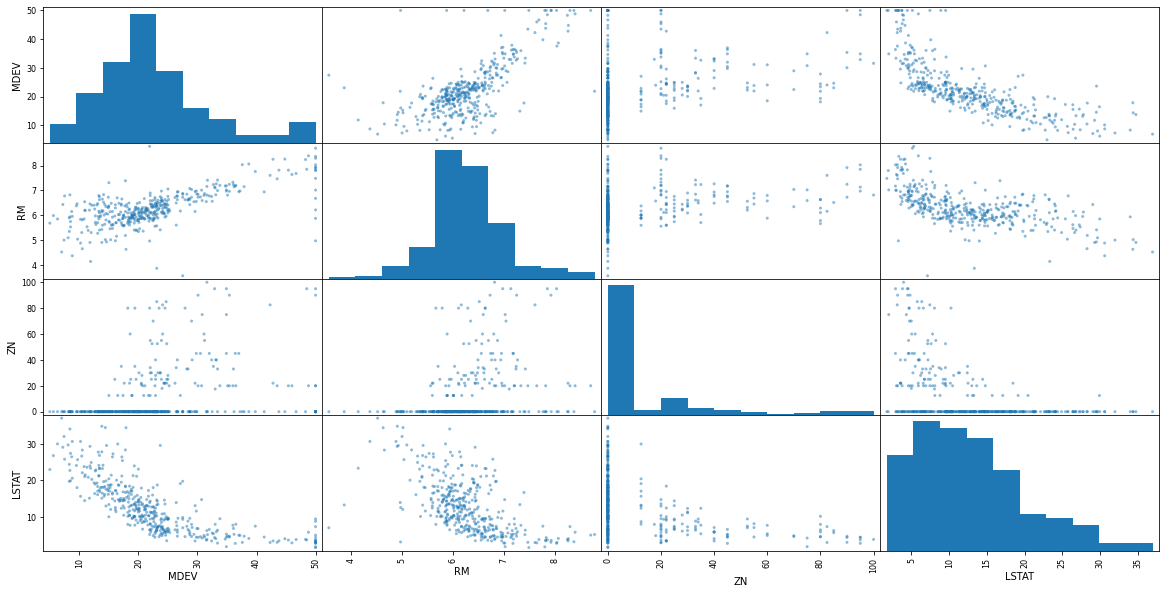

In [16]:
from pandas.plotting import scatter_matrix
attributes = ['MDEV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing_df[attributes], figsize=(20,10))

<AxesSubplot:xlabel='RM', ylabel='MDEV'>

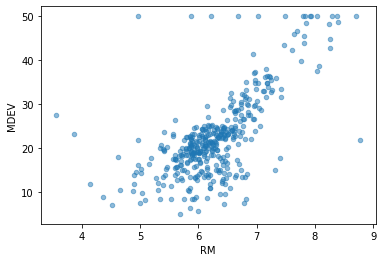

In [17]:
housing_df.plot(kind="scatter", x="RM", y="MDEV", alpha=0.5)

# Trying out attribute combinations 

In [18]:
housing_df['TAX_PER_ROOMS'] = housing_df['TAX']/housing_df['RM']

In [19]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV,TAX_PER_ROOMS
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
corr_matrix = housing_df.corr()
corr_matrix['MDEV'].sort_values(ascending=False)

MDEV             1.000000
RM               0.679409
B                0.361761
ZN               0.339741
DIS              0.240451
CHAS             0.205066
AGE             -0.364596
RAD             -0.374693
CRIM            -0.393715
NOX             -0.422873
TAX             -0.456657
INDUS           -0.473516
PTRATIO         -0.493534
TAX_PER_ROOMS   -0.525255
LSTAT           -0.740494
Name: MDEV, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='TAX_PER_ROOMS'>

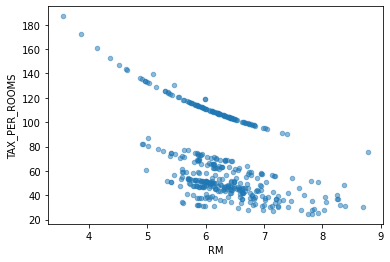

In [21]:
housing_df.plot(kind="scatter", x="RM", y="TAX_PER_ROOMS", alpha=0.5)

In [22]:
housing_df = strat_train_set.drop('MDEV', axis=1)
housing_labels = strat_train_set['MDEV'].copy()

# Missing Attributes

In [23]:
# To take care of missing values in the dataset, we have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole column(attribute)
#     3. Set the missing values to some values(0, mean, median)

In [24]:
a = housing_df.dropna(subset=['RM']) # This is option 1
a.shape

(400, 13)

In [25]:
housing_df.drop("RM", axis=1).shape # This is option 2
# There will be no RM values
# Also note that the original housing_df dataframe will remain unchanged

(404, 12)

In [26]:
median = housing_df["RM"].median() # Computing median for option 3
median

6.21

In [27]:
housing_df["RM"].fillna(median) # option 3
# Also note that the original housing_df dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [28]:
housing_df.shape

(404, 13)

In [29]:
housing_df.describe() # Before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.28214,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.71519,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.56100,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.87975,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.21000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.63200,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_df)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [32]:
imputer.statistics_.shape

(13,)

In [33]:
x = imputer.transform(housing_df)
housing_tr = pd.DataFrame(x, columns=housing_df.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281426,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711668,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Feature scaling

Primarily, two types of feature scaling methods:
    1. Min-max scaling (Normalization)
        (value - min)/(max - min)
        Sklearn provides a class called MinMaxScaler for this
    2. Standardization
            (value - mean)/std
            sklearn provides a class called StandardScaler for this

In [34]:
## Creating a pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
     ('std_scaler', StandardScaler()),
])

In [36]:
housing_num_tr = my_pipeline.fit_transform(housing_df)

In [37]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [38]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for our company Dragon real estates

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# model = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing_df.iloc[:5]

In [41]:
some_labels = housing_labels.iloc[:5]

In [42]:
prepared_data = my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([22.294, 25.165, 16.699, 23.496, 23.629])

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [46]:
rmse

1.1633738885050857

## Using better evaluation technique - Cross Validation Technique

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([2.86585432, 2.72364563, 4.63731588, 2.65687219, 3.40982517,
       2.77964904, 4.85466218, 3.24742895, 3.13159543, 3.36799267])

In [49]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std()) 

In [50]:
print_scores(rmse_scores)

Scores: [2.86585432 2.72364563 4.63731588 2.65687219 3.40982517 2.77964904
 4.85466218 3.24742895 3.13159543 3.36799267]
Mean: 3.367484145866741
Standard Deviation: 0.7357105987689909


## Saving the model

In [51]:
from joblib import dump, load
dump(model, 'dragon.joblib')

['dragon.joblib']

## Testing the model on test data

In [52]:
x_test = strat_test_set.drop("MDEV", axis=1)
y_test = strat_test_set["MDEV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [53]:
final_rmse

2.9940589834000315

In [55]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24399134, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [56]:
from joblib import dump, load
import numpy as np
model = load('dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -90.27288841, -1.42262747,
       -0.00024399134, -99.31238772,  2.111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.81164221, -0.86091034]])
model.predict(features)

array([23.373])